In [1]:
#imports

import os
import pandas as pd
from pathlib import Path

In [2]:
#designate the csv file data path
data_load = Path ('Resources/Housing.csv')

# uniform housing
housing = pd.read_csv(data_load,encoding="utf-8")

# Display the first few rows of the original DataFrame
print("Original DataFrame:")
(housing.head())

Original DataFrame:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,"$231,300.00",2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,"$538,000.00",3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,"$180,000.00",2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,"$604,000.00",4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,"$510,000.00",3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# List of columns to drop (replace with actual column names)
columns_to_drop = ['date', 'sqft_living', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

# Drop the specified columns and create a new DataFrame
housing = housing.drop(columns=columns_to_drop)

# Check for null and NaN values after dropping columns
print("\nNull and NaN values after dropping columns:")
print(housing.isnull().sum())




Null and NaN values after dropping columns:
id              0
 price          0
bedrooms        0
bathrooms       0
sqft_lot        0
floors          0
waterfront      0
view            0
condition       0
yr_built        0
yr_renovated    0
zipcode         0
lat             0
long            0
dtype: int64


In [4]:
# Check for duplicates in the DataFrame
duplicates = housing.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

if num_duplicates > 0:
    print(f"Number of duplicate rows: {num_duplicates}")
    # Display duplicate rows
    duplicate_rows = housing[duplicates]
    print("\nDuplicate rows:")
    print(duplicate_rows)
    
    # Remove duplicates and overwrite the DataFrame
    housing = housing.drop_duplicates()
    print("\nDuplicates removed.")
else:
    print("No duplicates found.")


Number of duplicate rows: 3

Duplicate rows:
               id         price   bedrooms  bathrooms  sqft_lot  floors  \
3951   1825069031   $550,000.00          4       1.75      8447     2.0   
14983  6308000010   $585,000.00          3       2.50      5089     2.0   
20054  8648900110   $555,000.00          3       2.50      3211     2.0   

       waterfront  view  condition  yr_built  yr_renovated  zipcode      lat  \
3951            0     3          4      1936          1980    98074  47.6499   
14983           0     0          3      2001             0    98006  47.5443   
20054           0     0          3      2009             0    98027  47.5644   

          long  
3951  -122.088  
14983 -122.172  
20054 -122.093  

Duplicates removed.


In [5]:
housing.rename(columns={
    'id': 'property_id',
    'price': 'sale_price',
    'bedrooms': 'num_bedrooms',
    'bathrooms': 'num_bathrooms',
    'sqft_lot': 'lot_size',
    'floors': 'num_floors',
    'waterfront': 'is_waterfront',
    'view': 'view_rating',
    'condition': 'condition_rating',
    'yr_built': 'year_built',
    'yr_renovated': 'year_renovated',
    'zipcode': 'zip_code',
    'lat': 'latitude',
    'long': 'longitude'
}, inplace=True)


In [6]:
housing.to_csv('Resources/ModifiedHomes.csv', index=False)
print("New DataFrame saved to 'Resources/ModifiedHomes.csv'")


New DataFrame saved to 'Resources/ModifiedHomes.csv'


In [7]:
pd.read_csv(data_load,encoding="utf-8")
housing.head(10)

,property_id,price,num_bedrooms,num_bathrooms,lot_size,num_floors,is_waterfront,view_rating,condition_rating,year_built,year_renovated,zip_code,latitude,longitude
0,7229300521,"$231,300.00",2,1.00,5650,1.0,0,0,3,1955,0,98178,47.5112,-122.257
1,6414100192,"$538,000.00",3,2.25,7242,2.0,0,0,3,1951,1991,98125,47.7210,-122.319
2,5631500400,"$180,000.00",2,1.00,10000,1.0,0,0,3,1933,0,98028,47.7379,-122.233
3,2487200875,"$604,000.00",4,3.00,5000,1.0,0,0,5,1965,0,98136,47.5208,-122.393
4,1954400510,"$510,000.00",3,2.00,8080,1.0,0,0,3,1987,0,98074,47.6168,-122.045
5,7237550310,"$1,225,000.00",4,4.50,101930,1.0,0,0,3,2001,0,98053,47.6561,-122.005
6,1321400060,"$257,500.00",3,2.25,6819,2.0,0,0,3,1995,0,98003,47.3097,-122.327
7,2008000270,"$291,850.00",3,1.50,9711,1.0,0,0,3,1963,0,98198,47.4095,-122.315
8,2414600126,"$229,500.00",3,1.00,7470,1.0,0,0,3,1960,0,98146,47.5123,-122.337
9,3793500160,"$323,000.00",3,2.50,6560,2.0,0,0,3,2003,0,98038,47.3684,-122.031


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [9]:
print(housing.dtypes)

property_id           int64
 price               object
num_bedrooms          int64
num_bathrooms       float64
lot_size              int64
num_floors          float64
is_waterfront         int64
view_rating           int64
condition_rating      int64
year_built            int64
year_renovated        int64
zip_code              int64
latitude            float64
longitude           float64
dtype: object


In [10]:
housing.columns

Index(['property_id', ' price ', 'num_bedrooms', 'num_bathrooms', 'lot_size',
       'num_floors', 'is_waterfront', 'view_rating', 'condition_rating',
       'year_built', 'year_renovated', 'zip_code', 'latitude', 'longitude'],
      dtype='object')

In [16]:
# Convert 'price' column to string type and remove dollar sign and commas
housing[' price '] = housing[' price '].astype(str)

#  Remove dollar sign and commas, and strip extra spaces
housing[' price '] = housing[' price '].str.replace('$', '').str.replace(',', '').str.strip()

# Replace commas as decimal points (if needed)
housing[' price '] = housing[' price '].str.replace(',', '.')

#  Convert to numeric
housing[' price '] = pd.to_numeric(housing[' price '], errors='coerce')

# Check for NaN values after conversion
print(housing[' price '].isnull().sum())

#print df to check conversion
housing

0


,property_id,price,num_bedrooms,num_bathrooms,lot_size,num_floors,is_waterfront,view_rating,condition_rating,year_built,year_renovated,zip_code,latitude,longitude
0,7229300521,231300.0,2,1.00,5650,1.0,0,0,3,1955,0,98178,47.5112,-122.257
1,6414100192,538000.0,3,2.25,7242,2.0,0,0,3,1951,1991,98125,47.7210,-122.319
2,5631500400,180000.0,2,1.00,10000,1.0,0,0,3,1933,0,98028,47.7379,-122.233
3,2487200875,604000.0,4,3.00,5000,1.0,0,0,5,1965,0,98136,47.5208,-122.393
4,1954400510,510000.0,3,2.00,8080,1.0,0,0,3,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1131,3.0,0,0,3,2009,0,98103,47.6993,-122.346
21609,6600060120,400000.0,4,2.50,5813,2.0,0,0,3,2014,0,98146,47.5107,-122.362
21610,1523300141,402101.0,2,0.75,1350,2.0,0,0,3,2009,0,98144,47.5944,-122.299
21611,291310100,400000.0,3,2.50,2388,2.0,0,0,3,2004,0,98027,47.5345,-122.069


In [17]:
#check datatypes to make sure price was converted
housing.dtypes

property_id           int64
 price              float64
num_bedrooms          int64
num_bathrooms       float64
lot_size              int64
num_floors          float64
is_waterfront         int64
view_rating           int64
condition_rating      int64
year_built            int64
year_renovated        int64
zip_code              int64
latitude            float64
longitude           float64
dtype: object

In [35]:
#print correlation of all the features
housing.corr()

,property_id,price,num_bedrooms,num_bathrooms,lot_size,num_floors,is_waterfront,view_rating,condition_rating,year_built,year_renovated,zip_code,latitude,longitude
property_id,1.000000,-0.016769,0.001307,0.005091,-0.132101,0.018480,-0.002717,0.011785,-0.023687,0.021217,-0.016688,-0.008126,-0.001862,0.020776
price,-0.016769,1.000000,0.308385,0.525142,0.089663,0.256801,0.266371,0.397413,0.036366,0.054009,0.126495,-0.053195,0.307006,0.021622
num_bedrooms,0.001307,0.308385,1.000000,0.515983,0.031709,0.175485,-0.006578,0.079445,0.028452,0.154296,0.018705,-0.152807,-0.008935,0.129483
num_bathrooms,0.005091,0.525142,0.515983,1.000000,0.087750,0.500669,0.063747,0.187891,-0.124940,0.505997,0.050879,-0.203831,0.024590,0.223047
lot_size,-0.132101,0.089663,0.031709,0.087750,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.053105,0.007677,-0.129611,-0.085680,0.229552
num_floors,0.018480,0.256801,0.175485,0.500669,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.489347,0.006156,-0.059025,0.049593,0.125343
is_waterfront,-0.002717,0.266371,-0.006578,0.063747,0.021601,0.023711,1.000000,0.401993,0.016652,-0.026159,0.092950,0.030277,-0.014272,-0.041904
view_rating,0.011785,0.397413,0.079445,0.187891,0.074753,0.029325,0.401993,1.000000,0.045836,-0.053229,0.103208,0.084838,0.006049,-0.078560
condition_rating,-0.023687,0.036366,0.028452,-0.124940,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.361347,-0.060862,0.002962,-0.014971,-0.106512
year_built,0.021217,0.054009,0.154296,0.505997,0.053105,0.489347,-0.026159,-0.053229,-0.361347,1.000000,-0.224729,-0.346808,-0.148099,0.409395


(0.0, 8081250.0)

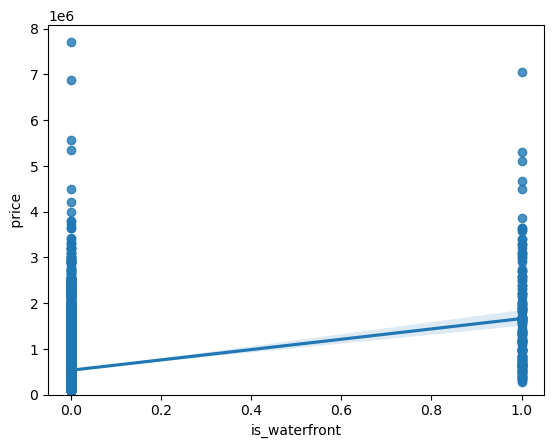

In [22]:
#plot correlation between waterfront view and price
sns.regplot(x= 'is_waterfront', y=' price ', data = housing)
plt.ylim(0,)

In [23]:
#print numerical correlation to cross reference with chart
housing[['is_waterfront', ' price ']].corr()

,is_waterfront,price
is_waterfront,1.000000,0.266371
price,0.266371,1.000000


<Axes: xlabel='num_bedrooms', ylabel=' price '>

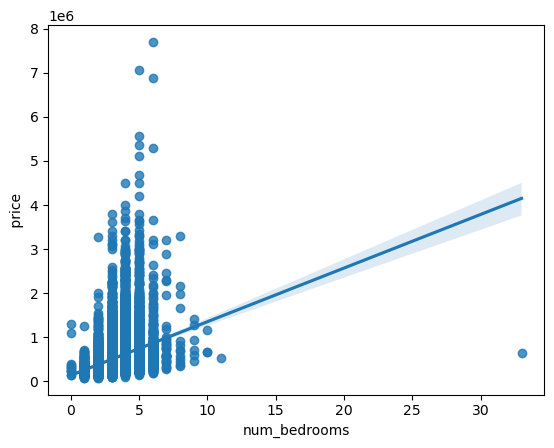

In [24]:
#plot correlation between number of bedrooms and price
sns.regplot(x= 'num_bedrooms', y=' price ', data = housing)


In [25]:
housing[['num_bedrooms', ' price ']].corr()

,num_bedrooms,price
num_bedrooms,1.000000,0.308385
price,0.308385,1.000000


<Axes: xlabel='num_bathrooms', ylabel=' price '>

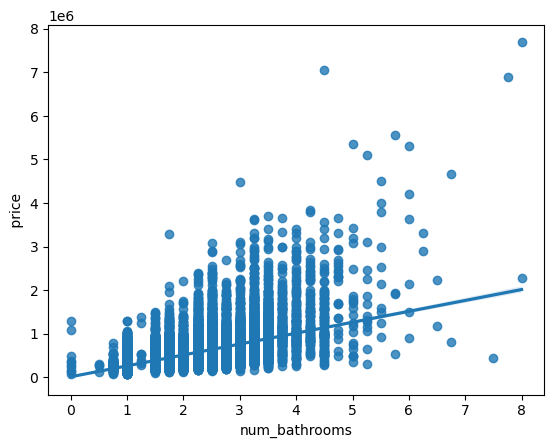

In [26]:
#plot correlation between number of bathrooms and price
sns.regplot(x= 'num_bathrooms', y=' price ', data = housing)


In [27]:
housing[['num_bathrooms', ' price ']].corr()

,num_bathrooms,price
num_bathrooms,1.000000,0.525142
price,0.525142,1.000000


<Axes: xlabel='year_built', ylabel=' price '>

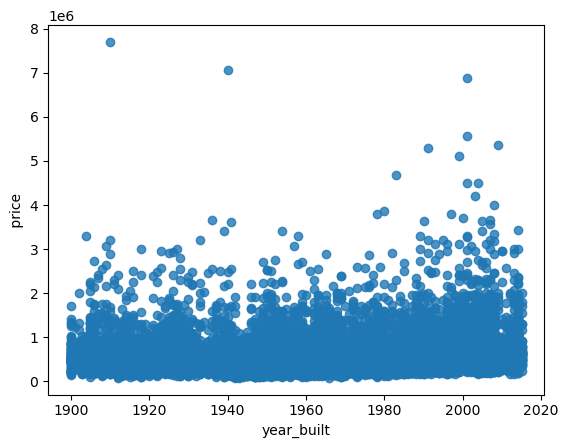

In [28]:
#plot correlation between year built and price
sns.regplot(x= 'year_built', y=' price ', data = housing)


In [29]:
housing[['year_built', ' price ']].corr()

,year_built,price
year_built,1.000000,0.054009
price,0.054009,1.000000


<Axes: xlabel='lot_size', ylabel=' price '>

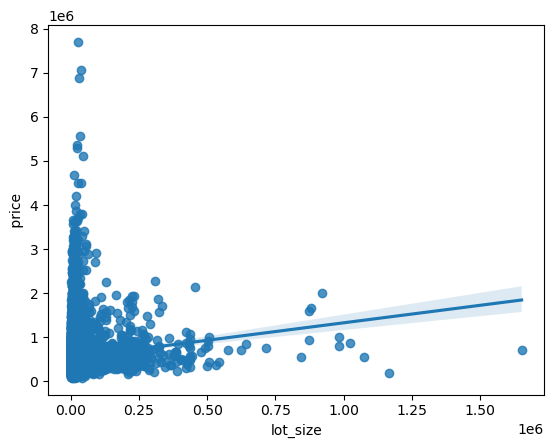

In [30]:
#plot correlation between lot size and price
sns.regplot(x= 'lot_size', y=' price ', data = housing)


In [31]:
housing[['lot_size', ' price ']].corr()

,lot_size,price
lot_size,1.000000,0.089663
price,0.089663,1.000000


<Axes: xlabel='num_floors', ylabel=' price '>

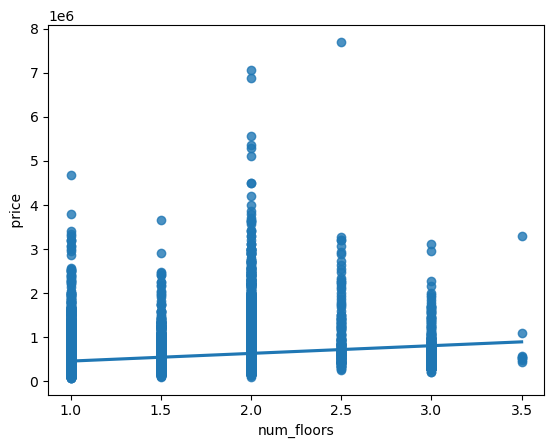

In [32]:
#plot correlation between number of floors and price
sns.regplot(x= 'num_floors', y=' price ', data = housing)


In [33]:
housing[['num_floors', ' price ']].corr()

,num_floors,price
num_floors,1.000000,0.256801
price,0.256801,1.000000


<Axes: xlabel='zip_code', ylabel=' price '>

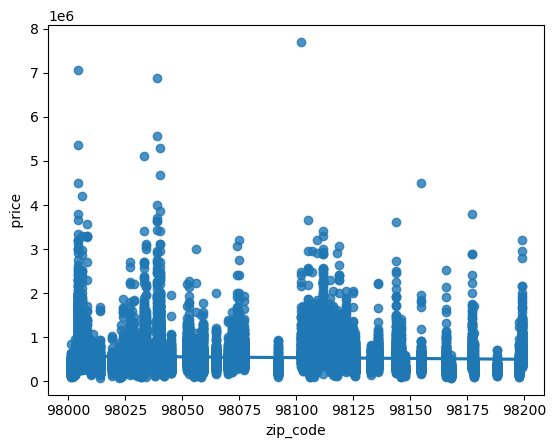

In [34]:
#plot correlation between zip code and price
sns.regplot(x= 'zip_code', y=' price ', data = housing)


In [36]:
housing[['zip_code', ' price ']].corr()

,zip_code,price
zip_code,1.000000,-0.053195
price,-0.053195,1.000000


<Axes: xlabel='year_built', ylabel='year_renovated'>

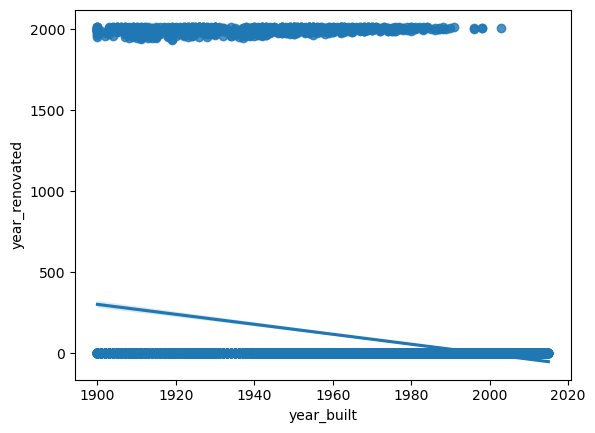

In [39]:
#plot correlation between year built and year renovated
sns.regplot(x= 'year_built', y='year_renovated', data = housing)


In [40]:
housing[['year_built', 'year_renovated']].corr()

,year_built,year_renovated
year_built,1.000000,-0.224729
year_renovated,-0.224729,1.000000


<Axes: xlabel='year_renovated', ylabel=' price '>

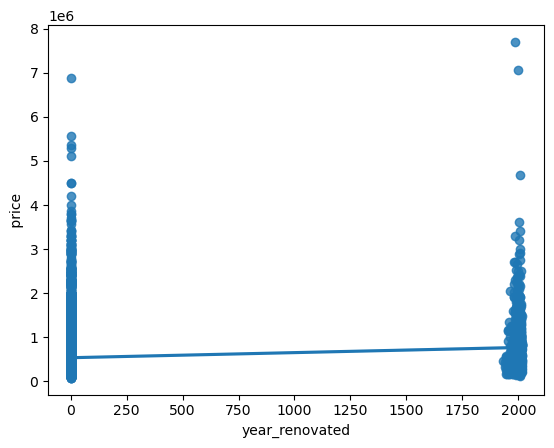

In [41]:
#plot correlation between year renovated and price
sns.regplot(x= 'year_renovated', y=' price ', data = housing)


In [43]:
housing[['year_renovated', ' price ']].corr()

,year_renovated,price
year_renovated,1.000000,0.126495
price,0.126495,1.000000
